In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


## **Data Set Information:**

Extraction was done by **Barry Becker from the 1994 Census database**. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


## **Attribute Information:**

### **Listing of attributes:**

1) **age:** continuous.

2) **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3) **fnlwgt:** continuous.

4) **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5) **education-num:** continuous.

6) **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7) **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8) **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9) **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10) **sex:** Female, Male.

11) **capital-gain:** continuous.

12) **capital-loss:** continuous.

13) **hours-per-week:** continuous.

14) **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 
15) **income** = >50K, <=50K.

## **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report

## **Importing the Dataset**

In [ ]:
df = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
cols = list(df.columns.values)
str_cols = []
num_cols = []
for i in range(0,15):
    if df.iloc[:,i].dtype == 'object':
        str_cols.append(cols[i])
    else:
        num_cols.append(cols[i])

In [ ]:
for i in str_cols:
    print(df[i].str.contains('\?').value_counts(),'\n')
    print('-'*40)

False    30725
True      1836
Name: workclass, dtype: int64 

----------------------------------------
False    32561
Name: education, dtype: int64 

----------------------------------------
False    32561
Name: marital.status, dtype: int64 

----------------------------------------
False    30718
True      1843
Name: occupation, dtype: int64 

----------------------------------------
False    32561
Name: relationship, dtype: int64 

----------------------------------------
False    32561
Name: race, dtype: int64 

----------------------------------------
False    32561
Name: sex, dtype: int64 

----------------------------------------
False    31978
True       583
Name: native.country, dtype: int64 

----------------------------------------
False    32561
Name: income, dtype: int64 

----------------------------------------


In [ ]:
for i in ('workclass', 'occupation', 'native.country'):
    print(df[i].value_counts()[df[i].value_counts() == df[i].value_counts().max()],'\n')
    print('-'*40)

Private    22696
Name: workclass, dtype: int64 

----------------------------------------
Prof-specialty    4140
Name: occupation, dtype: int64 

----------------------------------------
United-States    29170
Name: native.country, dtype: int64 

----------------------------------------


In [ ]:
df['workclass'] = df['workclass'].str.replace('\?','Private',regex = True)
df['occupation'] = df['occupation'].str.replace('\?','Prof-specialty',regex = True)
df['native.country'] = df['native.country'].str.replace('\?','United-States',regex = True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [ ]:
a = df['education'].unique()
for i in a:
    print(i,':\n',df.loc[df['education'] == i].value_counts(df['income']),'\n')
    print('-'*20)

HS-grad :
 income
<=50K    8826
>50K     1675
dtype: int64 

--------------------
Some-college :
 income
<=50K    5904
>50K     1387
dtype: int64 

--------------------
7th-8th :
 income
<=50K    606
>50K      40
dtype: int64 

--------------------
10th :
 income
<=50K    871
>50K      62
dtype: int64 

--------------------
Doctorate :
 income
>50K     306
<=50K    107
dtype: int64 

--------------------
Prof-school :
 income
>50K     423
<=50K    153
dtype: int64 

--------------------
Bachelors :
 income
<=50K    3134
>50K     2221
dtype: int64 

--------------------
Masters :
 income
>50K     959
<=50K    764
dtype: int64 

--------------------
11th :
 income
<=50K    1115
>50K       60
dtype: int64 

--------------------
Assoc-acdm :
 income
<=50K    802
>50K     265
dtype: int64 

--------------------
Assoc-voc :
 income
<=50K    1021
>50K      361
dtype: int64 

--------------------
1st-4th :
 income
<=50K    162
>50K       6
dtype: int64 

--------------------
5th-6th :
 income


In [ ]:
b = df['marital.status'].unique()
for i in b:
    print(i,':\n',df.loc[df['marital.status'] == i].value_counts(df['income']),'\n')
    print('-'*20)

Widowed :
 income
<=50K    908
>50K      85
dtype: int64 

--------------------
Divorced :
 income
<=50K    3980
>50K      463
dtype: int64 

--------------------
Separated :
 income
<=50K    959
>50K      66
dtype: int64 

--------------------
Never-married :
 income
<=50K    10192
>50K       491
dtype: int64 

--------------------
Married-civ-spouse :
 income
<=50K    8284
>50K     6692
dtype: int64 

--------------------
Married-spouse-absent :
 income
<=50K    384
>50K      34
dtype: int64 

--------------------
Married-AF-spouse :
 income
<=50K    13
>50K     10
dtype: int64 

--------------------


In [ ]:
df['education'] = df['education'].str.replace('HS-grad|9th|Preschool|12th|1st-4th|11th|10th|7th-8th|Some-college|5th-6th','Low-education',regex = True)
df['education'] = df['education'].str.replace('Assoc-voc|Masters|Prof-school|Doctorate','High-education',regex = True)
df['education'] = df['education'].str.replace('Bachelors|Assoc-acdm','Medium-education',regex = True)
df['marital.status'] = df['marital.status'].str.replace('Widowed|Divorced|Separated|Never-married|Married-spouse-absent','no',regex = True)
df['marital.status'] = df['marital.status'].str.replace('Married-civ-spouse|Married-AF-spouse','yes',regex = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('workclass','education','marital.status','occupation','relationship','race','sex','income'):
    df[i] = le.fit_transform(df[i])

In [ ]:
df.drop('native.country', axis = 1, inplace = True)

## **Data Visuaization**

<AxesSubplot:>

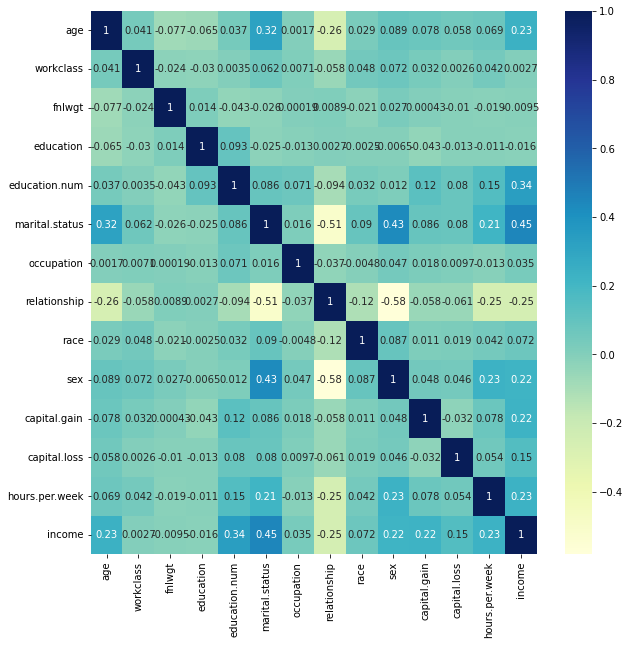

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True, cmap = 'YlGnBu')

## **Splitting the Dataset into Training Set and Test Set**

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df.iloc[:,[0,2,4,10,11,12]] = sc.fit_transform(df.iloc[:,[0,2,4,10,11,12]])
df.iloc[:,[0,2,4,10,11,12]] = sc.transform(df.iloc[:,[0,2,4,10,11,12]])

## **Fitting the Model**
### **Devising Confusion Matrix and Classification Report**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

gbc = GradientBoostingClassifier(random_state = 0, learning_rate=0.45) 
rfc = RandomForestClassifier(random_state = 0)
lr = LogisticRegression(random_state = 0)
dtc = DecisionTreeClassifier(random_state = 0)
svc = SVC(random_state = 0)
gnb = GaussianNB()
cnb = CategoricalNB()

lst = []

for i in(gbc,rfc,dtc,lr,svc,gnb,cnb):
    i.fit(x_train, y_train)
    
    i_pred = i.predict(x_test)
    
    cm = confusion_matrix(y_test, i_pred)
    
    cr = classification_report(y_test, i_pred)
    
    i_acc = round(accuracy_score(y_test, i_pred), 4)
    
    lst.append(i_acc)
    
    print(i,':\n','The confusion matrix:\n',cm,'\n')
    
    print('The classification report:\n',cr,'\n')
    
    print('-'*60)

GradientBoostingClassifier(learning_rate=0.45, random_state=0) :
 The confusion matrix:
 [[4677  289]
 [ 539 1008]] 

The classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4966
           1       0.78      0.65      0.71      1547

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513
 

------------------------------------------------------------
RandomForestClassifier(random_state=0) :
 The confusion matrix:
 [[4649  317]
 [ 597  950]] 

The classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4966
           1       0.75      0.61      0.68      1547

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513
 

-------------

In [ ]:
Table = pd.DataFrame({'Model':['Gradient Boosting Classifier','Random Forest Classifier',
                               'Logistic Regression','Decision Tree Classifier','SVC','GaussianNB','CategoricalNB'],
                     'Acc_Score': lst})

Table.sort_values('Acc_Score', ascending = False)


,Model,Acc_Score
0,Gradient Boosting Classifier,0.8729
1,Random Forest Classifier,0.8597
6,CategoricalNB,0.8554
2,Logistic Regression,0.8167
3,Decision Tree Classifier,0.8006
4,SVC,0.8006
5,GaussianNB,0.7981


**Please upvote if you find the content useful.**